In [19]:
from modules.processing import data_prep, file2object, object2file
import numpy as np
from modules.model import Model
from modules.model import ModelC
from modules.model import clus_uns
from numpy import mean
from modules.importance import *
import sys
import pandas as pd
import os
import matplotlib.pyplot as plt
#sys.stdout = open("D:/pych/ml/prad/M_csv_4000_3812.txt", "w+")

from modules.plots import *
from modules.model import rocc

import seaborn as sns; sns.set(color_codes=True)
DEBUG=True
def pause(DEBUG,s="Pause: push a button to continue",):
    if DEBUG:
        input(s)
        print ("continue ........")
#pause(DEBUG)
######################################

In [20]:
######################################
test2 = ["M_MAGEA4","M_DRGX","M_TMPRSS11B",'M_LIPF','M_AMBN','M_TECTB','M_BBOX1','M_SPATA31D5P','M_SGCZ','M_SLC6A19','M_AZU1','M_SPATA31D4','M_CDC20B','M_MCHR2','M_DPPA2','M_KIR2DL1','M_ZNF716','M_GLRA3','M_DAPL1','M_PNMA5','M_CCL25','M_LHFPL3-AS2','M_MCHR1','M_CXORF66','M_HOXA1','M_STARD3','M_PSMD3','M_CLEC2L','M_C11ORF53','M_ZNF706','M_ORMDL3','M_YWHAZ','M_C8ORF76','M_MTERF3','M_DSCR8','M_GJB7','M_COPS5','M_ELOC','M_DERL1','M_TSPEAR-AS2','M_NDUFAF6','M_OTUD6B','M_CCNE2','M_INTS8','M_CSH2','M_OSGIN2','M_POLR2K','M_ABCA17P','M_ATP6V1C1','M_TMEM70','M_ESRP1','M_SPAG1','M_TCAM1P','M_DDX25','M_MAL2','M_TRMT12','M_DCAF13','M_FAM49B','M_ENY2','M_SDR16C5','M_CHMP4C','M_TONSL','M_LIPJ','M_EMC2','M_RAD54B','M_ZFAND1','M_TMEM65','M_OR2A12','M_ANKRD46','M_ZNF7','M_PLEKHF2']
cat=["PATIENT_ID", "PATH_N_STAGE", "NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT", "PATH_T_STAGE", "PRIOR_DX" , "RADIATION_THERAPY"]
name="PATIENT_ID"
target="PATH_N_STAGE"
cat.remove(name)
cat.remove(target)
remove2=cat
print (remove2)
selection =test2
#####################################333333

['NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 'PATH_T_STAGE', 'PRIOR_DX', 'RADIATION_THERAPY']


# Workflow

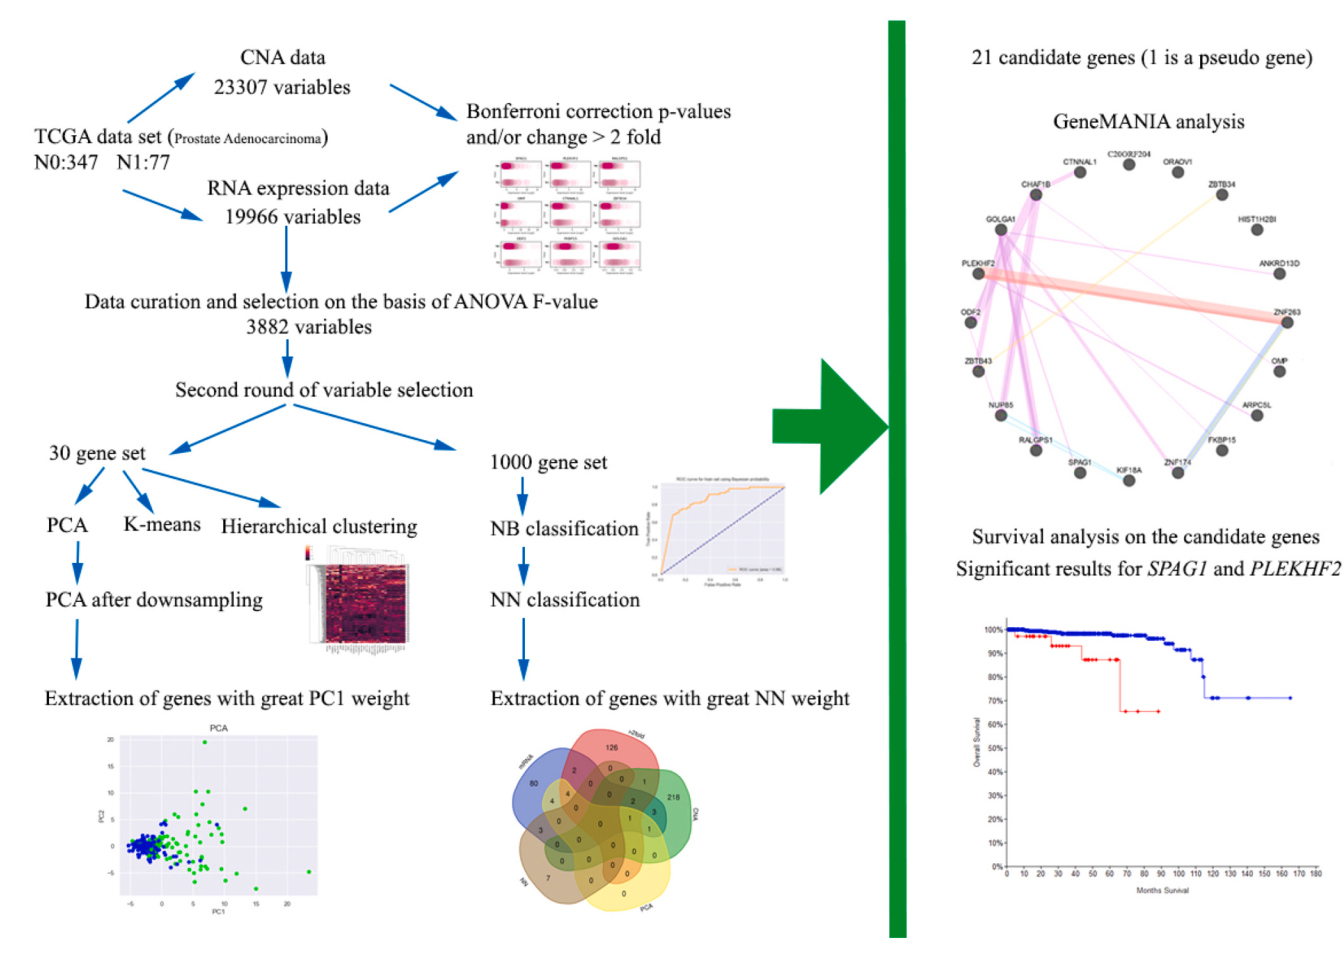


In [21]:
path="data_Prad/"
log(os.getcwd(),DEBUG)

#####################################333333
all_csv=path+"data_curated3trans.csv"
#test_csv="D:/pych/ml/prad/new.csv"
C_csv=path+"data_curated3-only_Ctrans.csv"
M_csv=path+"data_curated3-only_Mtrans.csv"


frequency = 2500  # Set Frequency To 2500 Hertz
duration = 500  # Set Duration To 1000 ms == 1 second
######################################
#input
sdffile=path+"all.sdf"
sdffilet=path+"ex_test.sdf"
activity=path+"MR1.csv"
#output
twod=path+"MR1-2d.sdf"
threed=path+"MR1-3D.sdf"
des_csv=path+"Descriptors_Table_MR1.csv"
twodt=path+"MR1-2d_t.sdf"
threedt=path+"MR1-3D_t.sdf"
des_csvt=path+"Descriptors_Table_t_MR1.csv"
des_datafile=path+"des-MR1.data"
finger_table=path+"Descriptors_Table-finger.csv"
finger_data=path+"finger-MR1.data"
frag_csv=path+"Descriptors_Table_MR1_des_frag.csv"
frag2_csv=path+"Descriptors_Table_MR1_des_frag2.csv"
frag3_csv=path+"Descriptors_Table_MR1_des_frag3.csv"
model_data=path+"model_MR1.data"
lime_data=path+"lime_MR1.data"
limet_data=path+"limet_MR1.data"
treei_data=path+"tree_MR1.data"
imagepath1=path+"images/"
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 500  # Set Duration To 1000 ms == 1 second
#####################################################################################################################################

D:\pych\ml\MR1


In [54]:
#Data preparation and cleaning
#set = data_prep (M_csv, Scaled ="off", Normal = "off", FS="clas", Cor="off", ndes =30, rs=10, vt=0.0, output=path+"M_30_T_noscale.data", imputation="on",TARGET=target, NAME=name, REMOVE=remove2, rowremoval=3)
#set1=file2object(path+"M_4000_T_noscale.data")
set1=file2object(path+"M_1000_T_noscale.data")
set2=file2object(path+"M_30_T_noscale.data")

print ("number of train= ", len(set1[1]))
print ("number of test = ", len(set1[3]))
print ("original variables= ",len(set1[7]))
print ("selected variables= ", len(set1[4]))

number of train=  333
number of test =  84
original variables=  19966
selected variables=  1000


In [56]:
signif=["M_SPAG1", "M_PLEKHF2", "M_RALGPS1", "M_OMP", "M_CTNNAL1", "M_ZBTB34", "M_ODF2", "M_FKBP15", "M_GOLGA1"]#9
pca1=["OMP", "SPAG1", "RALGPS1", "CHAF1B", "ORAOV1", "CTNNAL1", "ZNF174", "C20ORF204", "FKBP15"]#9
pca1andsig=["OMP", "SPAG1", "RALGPS1", "CTNNAL1", "FKBP15"]#5
pca1orsignif= ["SPAG1", "PLEKHF2", "RALGPS1", "OMP", "CTNNAL1", "ZBTB34", "ODF2", "FKBP15", "GOLGA1", "CHAF1B", "ORAOV1", "ZNF174", "C20ORF204"]
only_pca1= ["CHAF1B", "ORAOV1", "ZNF174", "C20ORF204", "ZNF263"]#4+1
pca1just = ["CHAF1B", "ORAOV1", "ZNF174", "C20ORF204", "ZNF263"]
test1= ["M_PSMD2","M_STAT6", "M_VCX2", "M_BTBD18", "M_TAS2R20", "M_MBOAT4"]
cna=["RALGPS1", "ZBTB34", "GOLGA1", "ORAOV1"]
#f = ["M_MAGEA4"]
signif2=["M_SPAG1", "M_PLEKHF2", "M_RALGPS1"]


In [59]:
f= signif
allx = pd.concat([set1[0], set1[2]], axis=0)

def cat(list2, var1, rep1,var2 ,rep2):
    list2= map(str,list2)
    for i in range (0,len(list2)):
        #print list2
        #print list2[i], i
        if list2[i]== var1:
            list2[i]= rep1
        elif list2[i]==var2:
            #print list2[i]
            list2[i]= rep2
    return list2

#map (str,set1[3])
#print (set1[3])

#set1[1]=cat(set1[1],"1","N1","2","N0")
#set1[3]=cat(set1[3],"1","N1","2","N0")

#allx = pd.concat([set1[0], set1[2]], axis=0)
ally = list(set1[1]) + list(set1[3])

#set1[0].iloc[:, 10]
#plt.hist(set1[0].iloc[:,10])
#plt.hist(set1[0].loc[:,"M_SPAG1"])






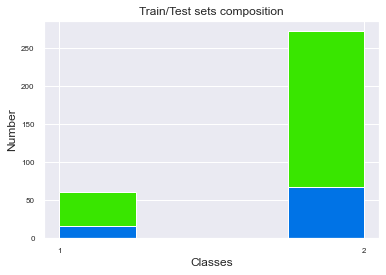

In [60]:
allx.index = ally
data=allx.loc[:, f]


plt.hist(set1[1] ,bins=4, color ="#39e600" )
plt.hist(set1[3], bins=4, color="#0073e6")
plt.xticks([1,2])
plt.title("Train/Test sets composition", fontsize=12)
plt.xlabel("Classes")
plt.ylabel("Number")
plt.show()

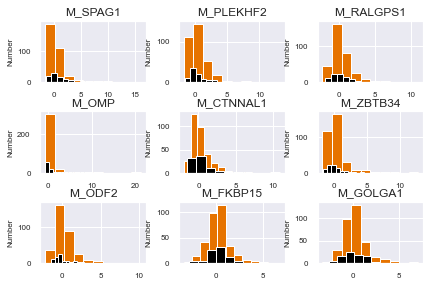

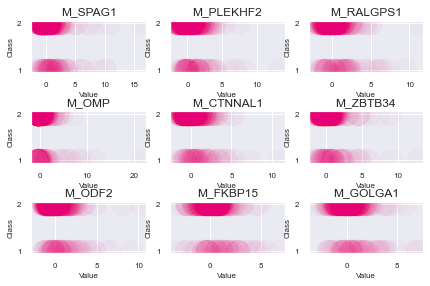

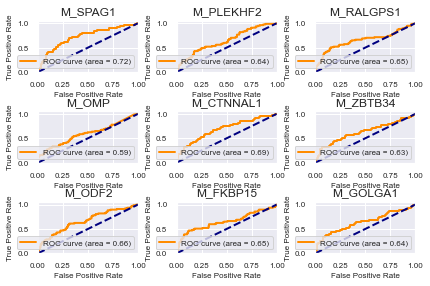

In [61]:
#print (set1[0].loc[:,f])
myplot (set1[0].loc[:,f],set1[1],n=3,type="his", df2=set1[2].loc[:, f], y2=set1[3])
#myplot(set1[0].loc[:, f], set1[1], n=3, type="his2d")

myplot(allx.loc[:, f], ally, n=3, type="scat")

myplot(allx.loc[:, f], ally, n=3, type="rocc")




In [62]:
#for i in range (0,len(f)):
    #rocc(set1[0].loc[:,f[i]],set1[1], title="ROCC for the Train set using " + str(f[i]) + " values")
    #rocc(set1[2].loc[:, f[i]], set1[3], title="ROCC for the Test set using " + str(f[i]) + " values")
    #rocc(allx.loc[:, f[i]], ally, title="ROCC for the whole set using " + str(f[i]) + " values")


D:\anaconda3_2\envs\mldlpy37\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


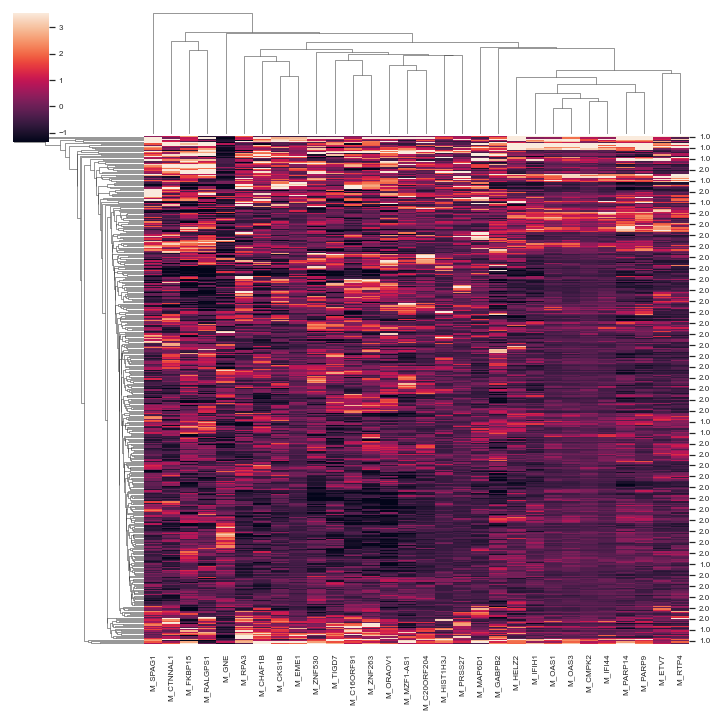

In [63]:
#ax1 =sns.catplot(data=data1, kind="swarm")
#print (dir(ax1))
#print (ax1._y_var)
#print (ax1._col_var)

ally2 = list(set2[1]) + list(set2[3])
allx2 = pd.concat([set2[0], set2[2]], axis=0)
allx2.index = ally2
#g = sns.clustermap(allx2)#, robust=True)#, method="single")#, metric="correlation")#, xticklabels=True, yticklabels=True)
g = sns.clustermap(allx2 , robust=True)
plt.show()

####################################################################################################################

In [69]:
TYPE = [ "tree", "rf", "ex", "lsvm", "svm", "lr", "ld",  "rg", "per", "gb", "ada","gunb" ,"kn", "nn"]
#svm,"el", "la", "ll",, "ardr":long , "ransa", "kn", "gu", "bg", "the": a bit long
TYPE2=["rf","svm","nn"]
TYPE3=["nn", "per", "gunb","rf", "svm", "tree"]
TYPE4= ["rf","ex","gb","nn","gunb"]
TYPE5=["gunb","nn"]
TYPE6=["gunb"]
TYPE7=["lsvm", "lr", "per" ,"nn","gunb"]
TYPE8=["lr","ld"]
c=2
###################################################################################################################

number of train=  333
number of test =  84
original variables=  19966
selected variables=  1000


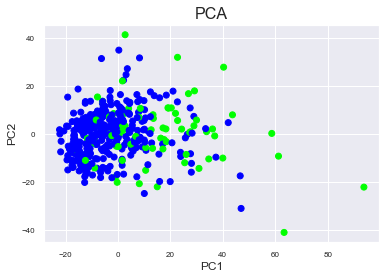

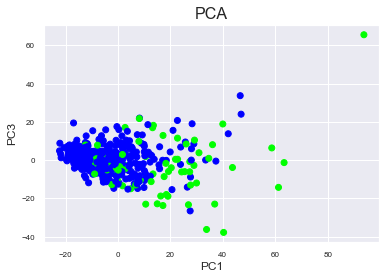

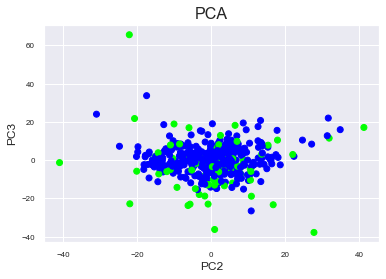

D:\pych\ml\MR1\modules\model.py:177: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


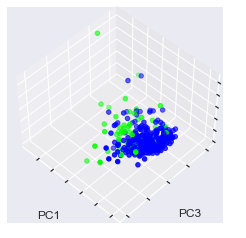

In [64]:
set1[0].to_csv(path+"M_1000_train.csv")
set1[2].to_csv(path+"M_1000_test.csv")

allx = pd.concat([set1[0], set1[2]], axis=0)
ally = list(set1[1]) + list(set1[3])

print ("number of train= ", len(set1[1]))
print ("number of test = ", len(set1[3]))
print ("original variables= ", len(set1[7]))
print ("selected variables= ", len(set1[4]))

#PCA 
pca = clus_uns(allx, ally)
#rocc(pca[0], ally, title="ROC curve using PC1")
#rocc(pca[1], ally, title="ROC curve for PC2")
#rocc(pca[2], ally, title="ROC curve for PC3")

#pca=clus_uns(set1[0], set1[1])
#rocc(pca[0], set1[1])
#pca = clus_uns(set1[2], set1[3])
#rocc(pca[0], set1[3])



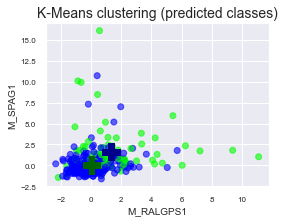

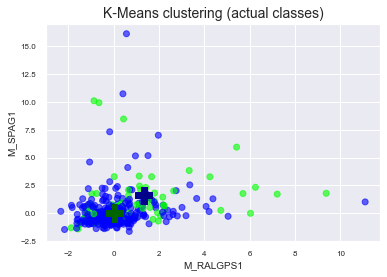

In [65]:
#Kmeans clustering
#clus_uns(set1[0], set1[1],M="pc-km", xtest=set1[2],ytest=set1[3], n=20)
clus_uns(set1[0], set1[1],M="kmeans", xtest=set1[2],ytest=set1[3], v1="M_RALGPS1", v2="M_SPAG1", v_names=set1[4])

Kmeans Confusion matrix
(It is not generated by these codes))

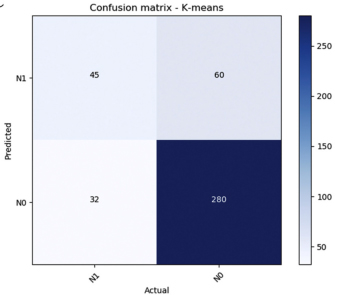

In [72]:

for m2 in TYPE6:#GaussianNB

    print (50 * "*")
    print ("model= ", m2)
    #print "test set", set1[3]
    for s in range (1,2):
        model = ModelC (set1[0],set1[1],set1[2],set1[3],set1[4], M=m2, c1=c,  cv="kf", rs=s)
        if m2 !="lsvm":
            print (m2, s, "Ac=", model[0]["accuracy_score_train"], "Ac_CV=", model[0]["accuracy_score_LOO"], "Ac_test=",model[0]["accuracy_score_test"])# model[0]["Pearson"],
            #VI=np.sort(model[0]["Variable Importance"])
            VI = model[0]["Variable Importance"]
            if m2=="nn":
                #print VI
                VIdf=pd.DataFrame(VI)
                VIdf.to_csv(path+"nn.csv")
                #print (np.sort(VI))

            #print (VI)
            prob1=model[0]["probability_train"][:,0]
            prob2=model[0]["probability_test"][:,0]

        else:
            pass
            #print ("q2=", model[1],"q2F2=",model[1]["Q2F2"],model[0])
            
        #rocc(prob1, set1[1], title="ROC curve for train set using Bayesian probability")
        #rocc(prob2, set1[3], title="ROC curve for test set using Bayesian probability")
        
        #lime2(model[2], set1[0], set1[4], n=8)
        #tree(model[2], set1[0], set1[4])
        #partial(set1[0],set1[1],model[0]["Variable Importance"],n=4)
    print (50 * "#")
#xx=set1[0].loc[:,f]
#xxt=set1[2].loc[:,f]
#fff=f

#################################################################################################################

**************************************************
model=  gunb
gunb 1 Ac= 0.8618618618618619 Ac_CV= 0.8348348348348348 Ac_test= 0.8095238095238095
##################################################


GeneMania Analysis of gene Association

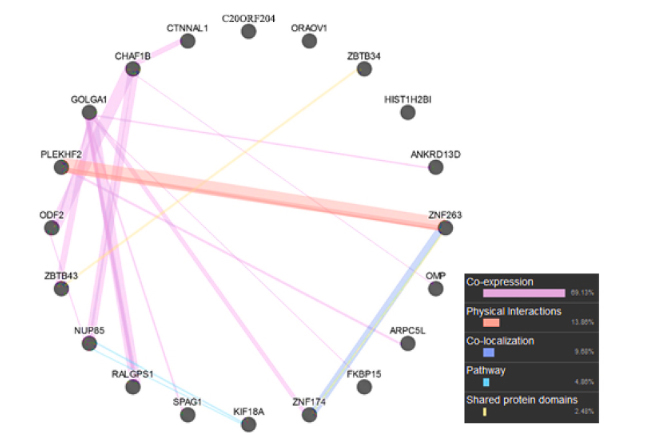

Survival Analysis of Spag1 gene by cBioPortal tools

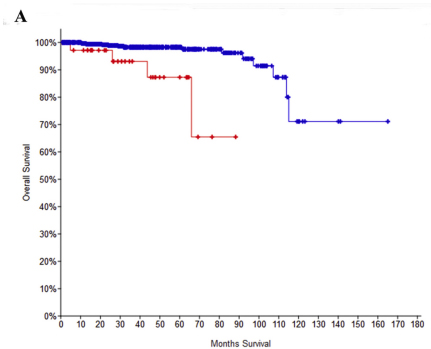